# Libraries

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

import matplotlib as mpl

import fresnel
import math

# Exporting

In [2]:
from datetime import date

# My local path to the figure data - please replace with your own
figdata_path = os.getcwd() + '/figure-data/'
# My local path to where I am storing generated figures i.e. in the shared GDrive - please replace with your own
figdir = os.getcwd() + '/Output/' + date.today().strftime('%Y%m%d') + '/'
print(figdir)
print(figdata_path)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909/
/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/


# Figure Making

In [3]:
plt.rc('font', family='Arial')

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['figure.figsize'] = (4.0,3.0) # default = (6.0, 4.0)
mpl.rcParams['font.size']      = 14       # default = 10

mpl.rcParams['axes.linewidth']    = 0.75 # default = 1.0
mpl.rcParams['lines.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['patch.linewidth']   = 1.0 # default = 1.0
mpl.rcParams['grid.linewidth']    = 0.5 # default = 0.5
mpl.rcParams['xtick.major.width'] = 0.75 # default = 0.5
mpl.rcParams['xtick.minor.width'] = 0.0 # default = 0.5
mpl.rcParams['ytick.major.width'] = 0.75 # default = 0.5
mpl.rcParams['ytick.minor.width'] = 0.0 # default = 0.5

def make_nice_axis(ax):
    """ Function to beautify axis"""
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.yaxis.set_tick_params(pad=10,top='on',direction='in')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

def save_figure(fig, fig_file, transparent=False):
    """
    Save the given figure object as PDF and PNG formats.

    Parameters:
    fig (matplotlib.figure.Figure): The figure object to be saved.
    fig_file (str): The file path (including the file name without extension) where the figure will be saved.

    Returns:
    None
    """
    os.makedirs(os.path.dirname(fig_file), exist_ok=True)
    fig.savefig(fname=fig_file + ".pdf", dpi=1200, format='pdf',bbox_inches='tight', transparent=transparent)
    fig.savefig(fname=fig_file + ".png", dpi=1200, format='png', transparent=transparent)

In [4]:
import matplotlib.colors as mcolors

# Species colors
node_pink = '#ef559f'
node_green = '#3ab261'
node_colors = [node_green, node_pink, '#efa873','#8bcbca']

decision_pink ='#f6accc'
decision_green = '#b0dbb8'

# Colorbar colors
cb_colors = ['#e7298a', '#34ac5c']
color1 = cb_colors[0] # Start color
color2 = cb_colors[1] # End color

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", [color1, "white", color2])

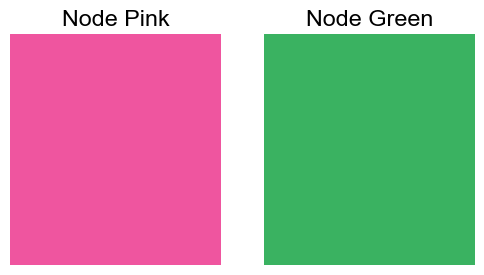

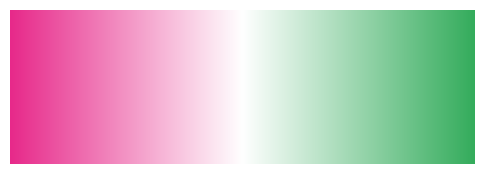

In [5]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(6, 3))

# Plot each color in a separate subplot
ax[0].add_patch(plt.Rectangle((0, 0), 1, 1, color=node_pink))
ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)
ax[0].axis('off')
ax[0].set_title('Node Pink')

ax[1].add_patch(plt.Rectangle((0, 0), 1, 1, color=node_green))
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)
ax[1].axis('off')
ax[1].set_title('Node Green')

# Display the colors
plt.show()

# Create a gradient image to display the colormap
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the colormap
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
ax.set_axis_off()

plt.show()

In [6]:
def imageLattice_spheres_fresnel(lattice, species_to_plot=[1,2,3,4], savefig=False, output_file="lattice_plot"):
    
    # Define color list using hex codes (converted to RGBA)
    color_list = [
        mcolors.to_rgba('#000000'),  # Species 1: Black
        mcolors.to_rgba('#B3B3B3'),  # Species 2: Grey
        mcolors.to_rgba('#34AC5C'),  # Species 3: Green
        mcolors.to_rgba('#CD5082'),  # Species 4: Pink
        mcolors.to_rgba('#EFA873'),  # Species 5: Orange
        mcolors.to_rgba('#68BBBA'),  # Species 6: Turquoise
        mcolors.to_rgba('#C572B8'),  # Species 7: Purple
        mcolors.to_rgba('#A7D450'),  # Species 8: Lime
        mcolors.to_rgba('#AF5E5E'),  # Species 9: Red
        mcolors.to_rgba('#9088F3')   # Species 10: Blue
    ]
    
    # Initialize Fresnel scene
    device = fresnel.Device()
    scene = fresnel.Scene(device)
    
    positions = []
    type_ids = []
    
    # Loop through provided species (skip species 0 if present)
    for sp in species_to_plot:
        if sp == 0:
            continue
        pos = np.argwhere(lattice == sp)
        if pos.size:
            positions.append(pos)
            type_ids.append(np.full(len(pos), sp - 1))
    
    # Flatten positions and type ids arrays
    if positions:
        positions = np.vstack(positions)
        type_ids = np.concatenate(type_ids)
    else:
        positions = np.array([])
        type_ids = np.array([])
    
    # Center the spheres within the box
    L = lattice.shape[0]
    if positions.size > 0:
        positions = positions - L/2 + 0.5
    
    # Create sphere geometry if positions exist
    if positions.size > 0:
        geometry = fresnel.geometry.Sphere(scene, N=len(positions), radius=0.5)
        geometry.position[:] = positions
        linear_colors = fresnel.color.linear(color_list)
        geometry.color[:] = [linear_colors[int(t)] for t in type_ids]
        geometry.material = fresnel.material.Material(roughness=0.5, primitive_color_mix=1.0)
    
    # Add a box around the scene with a lighter grey border (0.9, 0.9, 0.9)
    box = fresnel.geometry.Box(scene, [L, L, L, 0, 0, 0], box_radius=0.3, box_color=(0.5, 0.5, 0.5))
    box.material = fresnel.material.Material(roughness=0.5, primitive_color_mix=0.85)
    
    # Configure lighting and camera settings
    scene.lights = [
        fresnel.light.Light(direction=(0, 0, 1), color=(0.8, 0.8, 0.8), theta=math.pi),
        fresnel.light.Light(direction=(1, 1, 1), color=(1.1, 1.1, 1.1), theta=math.pi/3)
    ]
    scene.camera = fresnel.camera.Orthographic(
        position=(L * 2, L, L * 2),
        look_at=(0, 0, 0),
        up=(0, 1, 0),
        height=L * 1.4 + 1
    )
    scene.background_color = (1, 1, 1)
    
    # Render the scene at higher resolution
    tracer = fresnel.tracer.Path(device=device, w=1200, h=1200)
    image = tracer.sample(scene, samples=1000)
    
    # Convert the Fresnel image to a Matplotlib figure
    fig, ax = plt.subplots()
    ax.imshow(image[:], interpolation='lanczos')
    ax.axis('off')
    
    # Save the image if requested
    if savefig:
        output_dir = os.getcwd()
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        output_path = os.path.join(output_dir, f"{output_file}.png")
        fig.savefig(fname=output_path, dpi=600, format='png', bbox_inches='tight')
        print(f"Image saved to {output_path}")
    
    return fig, ax

# Plotting Figures

## Figure 1: Mean-Field Dynamics

In [7]:
figure = 'fig-1'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-1/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-1/example_dynamics


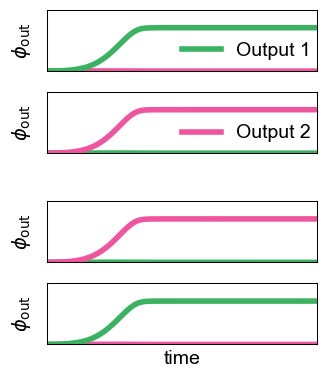

In [8]:
fig, ax = plt.subplots(5,1, figsize=(3.5,4), sharex=True, height_ratios=[1,1,0.1,1,1])

for a in ax:
    make_nice_axis(a)

data = np.load(figfol + 'example_dynamics/example_dynamics_0p0-0p25.npy')
ax[0].plot(data[:,0], data[:,1], color=node_colors[1], lw=4)
ax[0].plot(data[:,0], data[:,2], color=node_colors[0], lw=4, label='Output 1')

data = np.load(figfol + 'example_dynamics/example_dynamics_0p25-0p0.npy')
ax[1].plot(data[:,0], data[:,2], color=node_colors[0], lw=4)
ax[1].plot(data[:,0], data[:,1], color=node_colors[1], lw=4, label='Output 2')

data = np.load(figfol + 'example_dynamics/example_dynamics_0p25-0p0.npy')
ax[3].plot(data[:,0], data[:,2], color=node_colors[0], lw=4)
ax[3].plot(data[:,0], data[:,1], color=node_colors[1], lw=4)

data = np.load(figfol + 'example_dynamics/example_dynamics_0p0-0p25.npy')
ax[4].plot(data[:,0], data[:,1], color=node_colors[1], lw=4)
ax[4].plot(data[:,0], data[:,2], color=node_colors[0], lw=4, label='Output 1')

for a in ax:
    a.set_xlim(0, 4)
    a.set_ylim(0,1)
    a.tick_params(labelbottom=False)
    a.set_ylabel(r"$\phi_{\text{out}}$", labelpad=10)
    a.set_xticks([])
    a.set_yticks([])
    
ax[2].set_visible(False)

ax[0].legend(frameon=False, loc=(0.47,0.05))
ax[1].legend(frameon=False, loc=(0.47,0.05))

ax[-1].set_xlabel('time')

fig.tight_layout()

fig_save = True
fig_name = 'example_dynamics'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

## Figure 2: Molecular Interaction Networks as Multiphase Classifiers

In [9]:
figure = 'fig-2'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-2/


### Panel A: Training Data for Linear Classifier

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/linear_target-outcome


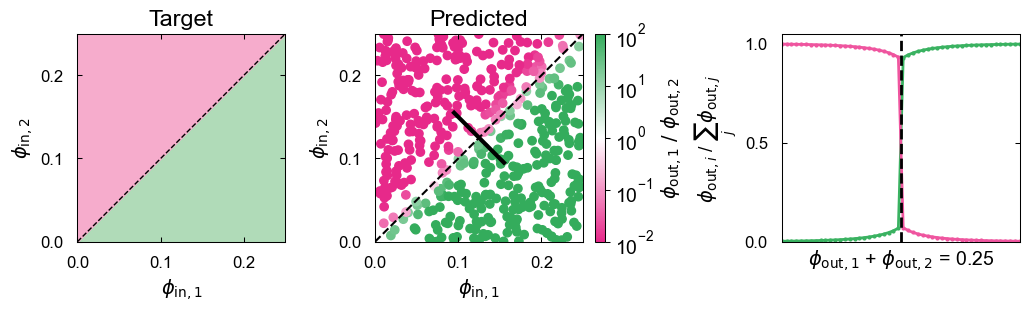

In [10]:
fig, ax = plt.subplots(1,3, figsize=(12,3), layout='compressed')

for a in ax:
    make_nice_axis(a)

decision_fn = lambda x: x
data = 0.25*np.random.rand(100,2)

colors = 2*np.int32(np.ceil(decision_fn(data[:,0]-data[:,1])))-1

xvals=np.linspace(0,0.25,100)
ax[0].fill_between(xvals, decision_fn(xvals), color=decision_green)
ax[0].fill_between(xvals, 0.25, decision_fn(xvals), color=decision_pink)
ax[0].plot(xvals, decision_fn(xvals), '--', linewidth=1, color='black')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xlabel(r'$\phi_{\text{in},1}$')
ax[0].set_ylabel(r'$\phi_{\text{in},2}$')
ax[0].set_title('Target')
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

data = np.load(figfol + 'linear_data/test_data_files/test_phis_final_linear_0hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_{\text{out},1}\ /\ \phi_{\text{out},2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

xvals=np.linspace(0,0.25,100)
ax[1].plot(xvals, xvals, ls='--', color='black',lw=1.5)
xvals=np.linspace(0.125 - 0.03, 0.125 + 0.03, 10)
ax[1].plot(xvals, 0.25 - xvals, ls='-', color='black',lw=3)
#ax[1].plot(xvals, 0.25 - xvals, ls='-', color='lightsteelblue',lw=2)
ax[1].plot()
ax[1].set_title('Predicted')
ax[1].set_xlabel(r'$\phi_{\text{in},1}$')
ax[1].set_ylabel(r'$\phi_{\text{in},2}$')
ax[1].set_xlim(0,0.25)
ax[1].set_ylim(0,0.25)
ax[1].set_xticks([0,0.1,0.2])
ax[1].set_yticks([0,0.1,0.2])
ax[1].set_aspect(1)

phi_out = np.load(figfol+'linear_data/temp-scan/linear_temperature_phi_out_along_path_1.npy')
ax[2].plot(np.arange(len(phi_out)), phi_out[:,0]/(phi_out[:,1]+phi_out[:,0]), color=node_colors[0], lw=2, marker='o', markersize=2)
ax[2].plot(np.arange(len(phi_out)), phi_out[:,1]/(phi_out[:,1]+phi_out[:,0]), color=node_colors[1], lw=2, marker='o', markersize=2)
ax[2].axvline(x=24.5, color='black', linestyle='--', lw = 2)
ax[2].set_xlabel(r'$\phi_{\text{out},1}$ + $\phi_{\text{out},2}$ = 0.25')
ax[2].set_ylabel(r'$\phi_{\text{out},i}$ / $\sum_j\phi_{\text{out},j}$')
ax[2].set_xlim(0,49)
ax[2].set_ylim(0,1.05)
ax[2].set_yticks([0,0.5,1])
ax[2].set_xticks([])

fig_save = True
fig_name = 'linear_target-outcome'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

### Panel B: Training Dynamics Illustration

In [11]:
file_panel_b = figfol + 'linear_data/loss_vals_linear_0hidden.npy'
data = np.load(file_panel_b)
steps = np.arange(0, data.shape[0])
print(data.shape)

(15000,)


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/model_A_loss


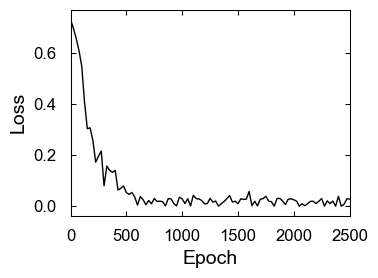

In [12]:
fig, ax = plt.subplots(1,1)
make_nice_axis(ax)
slice = 25
ax.plot(steps[::slice],(data[::slice]), color='black',lw=1.0)
ax.set_xlim(0,2500)
# callouts = [0,249,2499]
# markers = ['d','s','v']
# for i in callouts:
#     ax.scatter(i,(data[i]), color='purple', s=100, marker=markers[callouts.index(i)])

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
# ax.set_title('Optimization Procedure')

plt.tight_layout()
fig_save = True
fig_name = 'model_A_loss'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

In [13]:
def interaction_network(chi_mat, ax, cbar=False):
    vmax=15
    vmin=-15

    indices = np.tril_indices(4, k=-1)
    indices = [idx[1:] for idx in indices]
    colors = plt.cm.coolwarm((chi_mat[tuple(indices)]-vmin)/(vmax-vmin))

    x = [0,0,1,1]
    y = [1,0,1,0]
    all_node_colors = ['black', 'grey'] + node_colors

    for i in range(len(colors)):
        ax.plot([x[indices[0][i]], x[indices[1][i]]], [y[indices[0][i]], y[indices[1][i]]], linewidth = 5, color = colors[i])
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=1250, color=all_node_colors[j], edgecolor='black', zorder=2)
    ax.set_xlim(-0.3,1.3)
    ax.set_ylim(-0.3,1.3)

    if cbar==True:

        im = ax.imshow([[0]], cmap='coolwarm', vmin=-15, vmax=15)
        im.set_visible(False)
        plt.colorbar(im)

    ax.set_axis_off()
    ax.set_aspect(1)

    return ax

def node_potentials(mu_res, ax, cbar=False):
    y = [0.65, 0.35]
    x = np.zeros(2)
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=1500, color=node_colors[j], edgecolor='black', zorder=2)
   # Add vertical line between the nodes
    mid_x = (y[0] + y[1]) / 2
    ax.hlines(mid_x, xmin=-0.15, xmax=0.15, colors='white', linewidth=1, zorder=1)
    
    im = ax.imshow([np.concatenate([mu_res])], cmap='gray', vmin=-5, vmax=0, extent=[-0.15,0.15,0.2,0.8])
    ax.set_axis_off()

    if cbar==True:
        plt.colorbar(im)

    return ax

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/chi_model_A_epoch_0_untrained


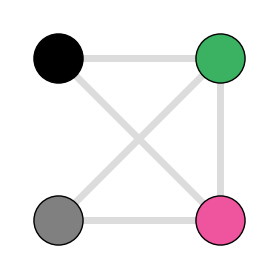

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/mu_model_A_epoch_untrained


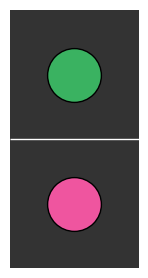

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/chi_model_A_epoch_0


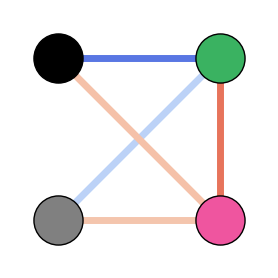

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/mu_model_A_epoch_0


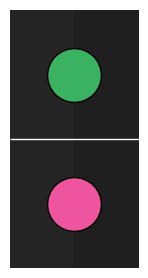

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/chi_model_A_epoch_5


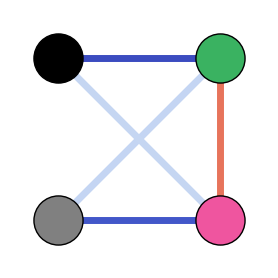

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/mu_model_A_epoch_5


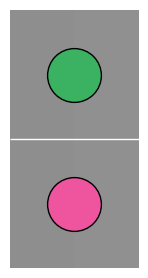

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/chi_model_A_epoch_49


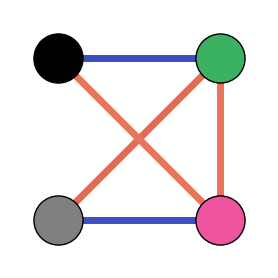

/var/folders/tn/6dvdxfx54kq8rf4qqzs3yscm0000gp/T/ipykernel_40074/861055300.py:95: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/mu_model_A_epoch_49


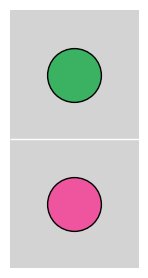

In [14]:
fig, ax = plt.subplots(1,1,figsize=(4,3))

chi_mat = np.load(figfol+'linear_progression/0/chi_matrix_linear_0hidden.npy')
ax = interaction_network(np.zeros_like(chi_mat), ax)
plt.tight_layout()
fig_save = True
fig_name = 'chi_model_A_epoch_0_untrained'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(2,3))
mu_res = np.load(figfol+'linear_progression/0/mu_reservoir_linear_0hidden.npy')
ax = node_potentials(-4*np.ones_like(mu_res), ax)
plt.tight_layout()
fig_save = True
fig_name = 'mu_model_A_epoch_untrained'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()


fig, ax = plt.subplots(1,1,figsize=(4,3))
chi_mat = np.load(figfol+'linear_progression/0/chi_matrix_linear_0hidden.npy')
ax = interaction_network(chi_mat, ax)
plt.tight_layout()
fig_save = True
fig_name = 'chi_model_A_epoch_0'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(2,3))
mu_res = np.load(figfol+'linear_progression/0/mu_reservoir_linear_0hidden.npy')
ax = node_potentials(mu_res, ax)
plt.tight_layout()
fig_save = True
fig_name = 'mu_model_A_epoch_0'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(4,3))
chi_mat = np.load(figfol+'linear_progression/5/chi_matrix_linear_0hidden.npy')
ax = interaction_network(chi_mat, ax)


plt.tight_layout()
fig_save = True
fig_name = 'chi_model_A_epoch_5'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(2,3))
mu_res = np.load(figfol+'linear_progression/5/mu_reservoir_linear_0hidden.npy')
ax = node_potentials(mu_res, ax)

plt.tight_layout()
fig_save = True
fig_name = 'mu_model_A_epoch_5'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(4,3))
chi_mat = np.load(figfol+'linear_progression/49/chi_matrix_linear_0hidden.npy')
ax = interaction_network(chi_mat, ax)

plt.tight_layout()
fig_save = True
fig_name = 'chi_model_A_epoch_49'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1,figsize=(2,3), layout='compressed')
mu_res = np.load(figfol+'linear_progression/49/mu_reservoir_linear_0hidden.npy')
ax = node_potentials(mu_res, ax)

plt.tight_layout()
fig_save = True
fig_name = 'mu_model_A_epoch_49'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()


/var/folders/tn/6dvdxfx54kq8rf4qqzs3yscm0000gp/T/ipykernel_40074/3152465999.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-2/chi_and_mu_colorbar


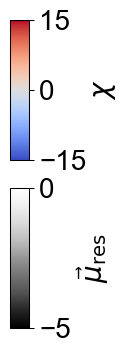

In [15]:
fig, ax = plt.subplots(2,1, figsize=(0.25, 4))

# Define the colormap and normalization
cmap = plt.cm.coolwarm
norm = mcolors.Normalize(vmin=-15, vmax=15)

# Create a ScalarMappable and add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = fig.colorbar(sm, cax=ax[0], orientation='vertical', aspect=10)
cbar.set_ticks([-15,0,15])
cbar.set_label(r'$\chi$', fontsize=20)
cbar.ax.tick_params(labelsize=20) 

cbar.ax.xaxis.set_label_position('bottom')
cbar.ax.tick_params(labelsize=20)  # Increase font size of tick labels

cmap = mpl.cm.Greys_r
norm = mpl.colors.Normalize(vmin=-5, vmax=0)

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax[1], orientation='vertical', aspect=50)
cbar.set_ticks([-5,0])
cbar.ax.xaxis.set_label_position('bottom')
cbar.set_label(r'$\vec{\mu}_\text{res}$', fontsize=20)
cbar.ax.tick_params(labelsize=20)  # Increase font size of tick labels

fig_save = True
fig_name = 'chi_and_mu_colorbar'

fig.tight_layout()

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

### Panel C: Testing Procedure

#### modelA test

## Figure 3: Hidden species enable multicomponent fluids to perform complex multiphase classification

In [16]:
figure = 'fig-3'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-3/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-3/model_A_AND_params


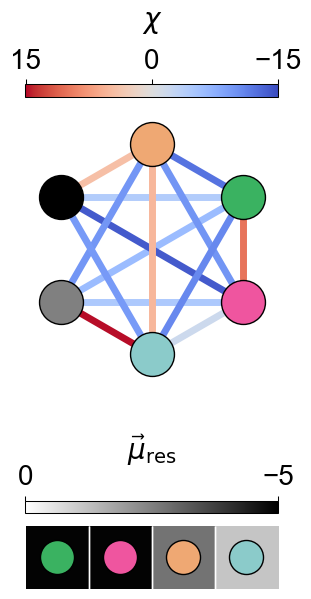

In [17]:
def interaction_network(chi_mat, ax):
    vmax=15
    vmin=-15

    indices = np.tril_indices(chi_mat.shape[0], k=-1)
    indices = [idx[1:] for idx in indices]
    colors = plt.cm.coolwarm((chi_mat[*indices]-vmin)/(vmax-vmin))

    x = [-np.sqrt(3)/2, -np.sqrt(3)/2, np.sqrt(3)/2, np.sqrt(3)/2, 0, 0]#[0,0,1,1, 0.5, 0.5]
    y = [1/2, -1/2, 1/2, -1/2, 1, -1]#[0.25, 0.75, 0.25, 0.75, -0.25, 1.25]
    all_node_colors = ['black', 'gray'] + node_colors

    for i in range(len(colors)):
        sm = ax.plot([x[indices[0][i]], x[indices[1][i]]], [y[indices[0][i]], y[indices[1][i]]], linewidth = 5, color = colors[i])
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=1000, color=all_node_colors[j], edgecolor='black', zorder=2)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.3, 1.3)

    im = ax.imshow([[0]], cmap='coolwarm', vmin=-15, vmax=15)
    im.set_visible(False)

    cbar = plt.colorbar(im, orientation='horizontal', location='top', pad=0.05)
    cbar.set_ticks([-15,0,15])
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(r'$\chi$', fontsize=20, labelpad=15)
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    
    ax.set_axis_off()
    ax.set_aspect(1)

    return ax

def node_potentials(mu_res, ax):
    x = np.flip(np.array([1, 1/3, -1/3, -1]))
    y = np.zeros(4)
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=600, color=node_colors[j], edgecolor='black', zorder=2) # s=1250
    ax.set_axis_off()
    
    im = ax.imshow(np.array([mu_res]), cmap='gray', vmin=-5, vmax=0, extent=[-4/3,4/3,-1/3,1/3])
    # Add vertical line between the nodes
    for i in range(len(x)-1):
        mid_x = (x[i] + x[i+1]) / 2
        ax.vlines(mid_x, ymin=-1/3, ymax=1/3, colors='white', linewidth=1, zorder=1)
        ax.vlines(mid_x, ymin=-1/3, ymax=1/3, colors='white', linewidth=1, zorder=1)

    cbar = plt.colorbar(im, orientation='horizontal', location='top', pad=0.1)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_label(r'$\vec{\mu}_\text{res}$', fontsize=20)
    cbar.set_ticks([0, -5])
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    
    return ax

chi_mat = np.load(figfol + 'and_data/chi_matrix_and_2hidden.npy')
mu_res = np.load(figfol + 'and_data/mu_reservoir_and_2hidden.npy')

fig, ax = plt.subplots(2, 1, figsize=(3, 6.5), constrained_layout='true', height_ratios=[2.5,1])

interaction_network(chi_mat, ax[0])
node_potentials(mu_res, ax[1])

fig_save = True
fig_name = 'model_A_AND_params'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-3/model_A_AND_test_10^2


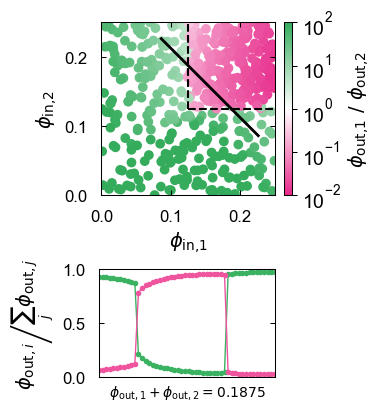

In [18]:
data = np.load(figfol+'and_data/test_phis_final_and_2hidden.npy')

fig, ax = plt.subplots(2,1, figsize=(3.7,4), constrained_layout=True, height_ratios=[4,2.5])
for a in ax:
    make_nice_axis(a)

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax[0].axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_aspect(1)

max_input = 0.25
tvals = np.linspace(-0.07, 0.07, 50)
xvals = 5*max_input/8 + tvals
yvals = 5*max_input/4 - xvals
ax[0].plot(xvals, yvals, ls='-', color='black', lw=2)
'''
plt.tight_layout()
fig_save = True
fig_name = 'model_A_AND_test_10^2'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

fig, ax = plt.subplots(1,1, figsize=(4,2))#, layout='compressed', height_ratios=[3,2])
make_nice_axis(ax)
'''
phi_out = np.load(figfol+f'and_data/temp-scan/and_temperature_phi_out_along_path_1.npy')
ax[1].plot(np.arange(len(phi_out)), phi_out[:,0]/np.sum(phi_out[:,:2], axis=1), '.-', color=node_colors[0])
ax[1].plot(np.arange(len(phi_out)), phi_out[:,1]/np.sum(phi_out[:,:2], axis=1), '.-', color=node_colors[1])

ax[1].set_xlim(0,49)
ax[1].set_ylim(0,1)
ax[1].set_xlabel(r'$\phi_{\text{out},1} + \phi_{\text{out},2}=0.1875$', fontsize=10)
ax[1].set_ylabel(r'$\phi_{\text{out},i}\left/\sum_j \phi_{\text{out},j}\right.$')
ax[1].set_xticks([])

#plt.tight_layout()
fig_save = True
fig_name = 'model_A_AND_test_10^2'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)

plt.show()

### Panel D: Solution to more nonlinear gates

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-3/model_A_test_10^2


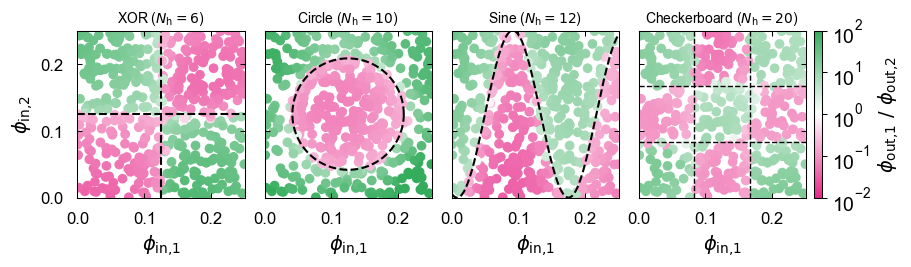

In [19]:
# Use LogNorm for logarithmic color scale
max_input=0.25

scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

fig, ax = plt.subplots(1,4, figsize=(9,3), layout='compressed', sharey=True)

for a in ax:
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

# XOR:

data = np.load(figfol+'xor_data/test_phis_final_xor_6hidden.npy')

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[0].axhline(0.125, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ls='--', color='black',lw=1.5)
ax[0].set_title(r'XOR ($N_\text{h}=6$)', fontsize=10)

# CIRCLE:

data = np.load(figfol+'circle_data/test_phis_final_circle_10hidden.npy')

sc = ax[1].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
r=0.25/3
theta_vals=np.linspace(0,2*np.pi,100)
ax[1].plot(max_input/2 + r*np.cos(theta_vals), max_input/2 + r*np.sin(theta_vals), ls='--', color='black',lw=1.5)
ax[1].set_title(r'Circle ($N_\text{h}=10$)', fontsize=10)

# SINE:

data = np.load(figfol+'sine_data/test_phis_final_sine_12hidden.npy')

sc = ax[2].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
xvals=np.linspace(0,max_input,500)
sine_boundary = (max_input / 2) * (1 + np.sin((3 / 2) * 2 * np.pi * (xvals / max_input - 0.2)))
ax[2].plot(xvals, sine_boundary, 'k--',lw=1.5)
ax[2].set_title(r'Sine ($N_\text{h}=12$)', fontsize=10)

# CHECKERBOARD:

data = np.load(figfol+'checkerboard_data/test_phis_final_checkerboard_20hidden.npy')

sc = ax[3].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
ax[3].set_title(r'Checkerboard ($N_\text{h}=20$)', fontsize=10)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax[3].axvline(max_input/3, ls='--', color='black')
ax[3].axvline(2*max_input/3, ls='--', color='black')
ax[3].axhline(max_input/3, ls='--', color='black')
ax[3].axhline(2*max_input/3, ls='--', color='black')

fig_save = True
fig_name = 'model_A_test_10^2'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

## Figure 4: Hidden species increase expressivity through encoding multiple, modular phases

In [20]:
figure = 'fig-4'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-4/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-4/success_phase_vs_hidden


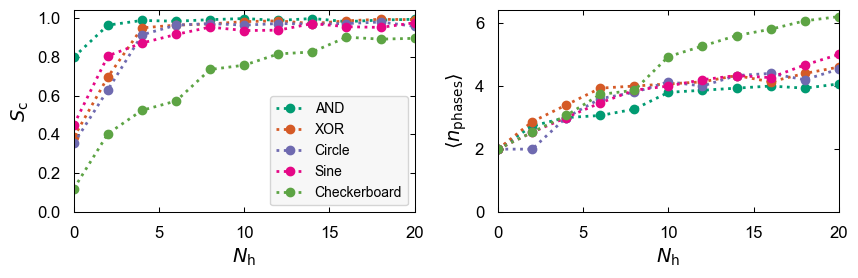

In [21]:
btypes = ['AND', 'XOR', 'Circle', 'Sine', 'Checkerboard']
colors = ['#009B72', '#D55A26', '#6F6AB0', '#E50786', '#5DA444']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 3))
make_nice_axis(ax1)
make_nice_axis(ax2)

for i, boundary_type in enumerate(btypes):
    data1 = np.load(figfol + f'{boundary_type}_data/{boundary_type}_test_success.npy')
    ax1.plot(np.arange(0, 2*len(data1), 2),
             data1,
             'o:',
             label=boundary_type,
             color=colors[i],
             lw=2)

    data2 = np.load(figfol + f'{boundary_type}_data/{boundary_type}_mean_num_phases.npy')
    ax2.plot(np.arange(0, 2*len(data2), 2),
             data2,
             'o:',
             label=boundary_type,
             color=colors[i],
             lw=2)

# axis formatting
y_labels = [r'$S_\text{c}$', r'$\langle n_\text{phases}\rangle$']
for ax, ylabel in zip((ax1, ax2), y_labels):
    ax.set_xlim(0, 20)
    ax.set_ylim(0,)
    ax.set_xlabel(r'$N_\text{h}$')
    ax.set_ylabel(ylabel)
    # remove any per‐axis legend:
    ax.legend_.remove() if ax.legend_ else None

#ax1.set_ylim(0,1)

# collect one set of handles & labels
handles, labels = ax1.get_legend_handles_labels()

# make room on the right and add a fig‐level legend
fig.tight_layout(rect=[0, 0, 0.8, 1])  # leave 15% on right for legend
ax1.legend(handles, labels, fontsize=10, facecolor='whitesmoke')
#fig.legend(handles,
#           labels,
#           loc='center left',
#           bbox_to_anchor=(0.8, 0.55),
#           frameon=False)

# plt.tight_layout()

fig_save = True
fig_name = 'success_phase_vs_hidden'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-4/xor_phase_vectors


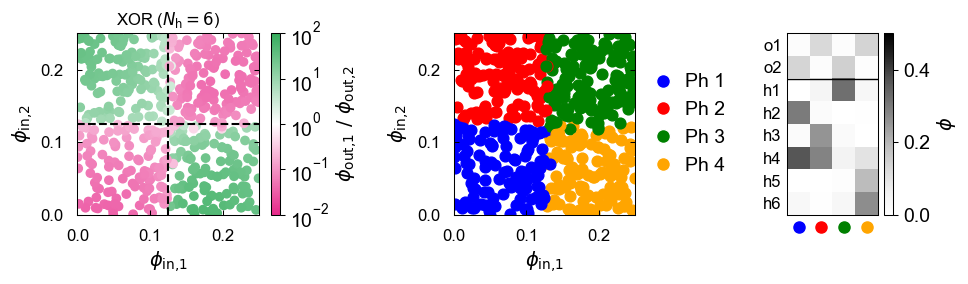

In [22]:
from matplotlib.lines import Line2D
from scipy import cluster

fig, ax = plt.subplots(1, 3, figsize=(10,3), gridspec_kw={'width_ratios': [2,2,1]})#, layout='compressed')

for a in ax:
    make_nice_axis(a)

####################

data = np.load(figfol + 'xor_data/test_phis_final_xor_6hidden.npy')

ax[0].set_aspect(1)

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

sc = ax[0].scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax[0].axhline(0.125, ls='--', color='black',lw=1.5)
ax[0].axvline(0.125, ls='--', color='black',lw=1.5)
ax[0].set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')
ax[0].set_xlim(0,0.25)
ax[0].set_ylim(0,0.25)
ax[0].set_xticks([0,0.1,0.2])
ax[0].set_yticks([0,0.1,0.2])
ax[0].set_title(r'XOR ($N_\text{h}=6$)', fontsize=12)
ax[0].set_aspect(1)

####################

data = np.load(figfol + 'xor_data/test_phis_final_xor_6hidden.npy')
phases = np.load(figfol + 'xor_data/cluster_densities_xor_6hidden.npy')
data_indices = cluster.hierarchy.fclusterdata(data, len(phases), criterion='maxclust', method='ward')

colors = ['blue', 'red', 'green', 'orange']
labels = ['Ph 1', 'Ph 2', 'Ph 3', 'Ph 4']

# scatter your data
for i in range(len(data)):
    idx = data_indices[i] - 1
    ax[1].scatter(*data[i, :2], color=colors[idx], s=60)

# make proxy artists
legend_handles = [
    Line2D([0], [0],
           marker='o',
           color='w',
           label=labels[i],
           markerfacecolor=colors[i],
           markersize=10)
    for i in range(len(colors))
]

# place legend outside to the right, centered vertically
ax[1].legend(handles=legend_handles,
          loc='center left',
          bbox_to_anchor=(0.95, 0.5),
          handletextpad=0.1,
          frameon=False)

ax[1].set_xlim(0, 0.25)
ax[1].set_ylim(0, 0.25)
ax[1].set_xlabel(r'$\phi_\text{in,1}$')
ax[1].set_ylabel(r'$\phi_\text{in,2}$')
ax[1].set_xticks([0,0.1,0.2])
ax[1].set_yticks([0,0.1,0.2])

ax[1].set_aspect(1)

####################

im=ax[2].imshow(phases.T, cmap='Grays', vmin=0, vmax=0.5)
ax[2].axhline(1.5, color='black')
plt.colorbar(im, ax=ax[2], label=r'$\phi$')

ax[2].set_xticks([])
ax[2].set_yticks([0,1,2,3,4,5,6,7])
ax[2].tick_params(left=False, right=False, pad=4)
ax[2].set_yticklabels(['o1', 'o2', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6'])

for i in range(4):
    ax[2].plot(0.125+0.25*i, -0.07, 'o', color=colors[i], markersize=8, transform=ax[2].transAxes, clip_on=False)

#[2].plot(1, 8, '^', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')
#ax[2].plot(2, 8, 'D', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')
#ax[2].plot(3, 8, 'o', color='black', markersize=8, clip_on=False, zorder=3)#, markerfacecolor='lightsteelblue')

fig.tight_layout()

fig_name = 'xor_phase_vectors'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

## Figure 5: Tuning compositions of trained mixtures is sufficient to generalize to novel decisions

In [23]:
figure = 'fig-5'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-5/


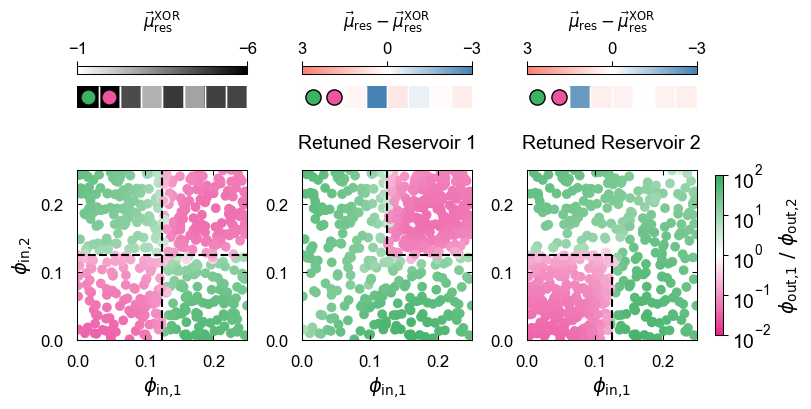

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-5/modelA_and_or_from_xor_TL


In [24]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(8,4), layout="constrained")

gs = GridSpec(2, 3, figure=fig, height_ratios=[1,3])

ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])

ax10 = fig.add_subplot(gs[1,0])
ax10.set_aspect(1)
ax11 = fig.add_subplot(gs[1,1])
ax11.set_aspect(1)
ax12 = fig.add_subplot(gs[1,2])
ax12.set_aspect(1)

#----------Row 1: Chemical Potential Vectors----------#

data = np.load(figfol+'xor_data/mu_reservoir_xor_6hidden.npy')
xor_data = data

def make_mu_panel(data, ax):

    x = [0, 1]
    y = np.zeros(4)
    node_colors = [node_green, node_pink]
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=120, color=node_colors[j], edgecolor='black', zorder=2) # s=1250
    ax.set_axis_off()

    ax.set_xticks([])
    ax.set_yticks([])

    # Plot the data using imshow, transposed for horizontal orientation
    im = ax.imshow(np.array(data).reshape(1, -1), cmap='gray', vmin=-6, vmax=-1)#, extent=[-0.5, 8.5, -0.5, 0.5])

    # Add a horizontal colorbar on top
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', fraction=0.6, pad=0.2, location='top')
    cbar.set_ticks([-1, -6])  # Set colorbar ticks in reverse order
    cbar.ax.tick_params(labelsize=12)  # Increase font size of tick labels
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    cbar.set_label(r'$\vec{\mu}_\text{res}^\text{XOR}$', fontsize=12, labelpad=10)
    # Add vertical line between the nodes
    for mid_y in np.arange(0.5,8.5):
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)

def make_diff_mu_panel(data, ax):

    x = [0, 1]
    y = np.zeros(4)
    node_colors = [node_green, node_pink]
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=120, color=node_colors[j], edgecolor='black', zorder=2) # s=1250
    ax.set_axis_off()

    ax.set_xticks([])
    ax.set_yticks([])

    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ['steelblue', "white", 'salmon'])

    # Plot the data using imshow, transposed for horizontal orientation
    im = ax.imshow(np.array(data - xor_data).reshape(1, -1), cmap=custom_cmap, vmin=-3, vmax=3)#, cmap='gray', vmin=-5, vmax=0)#, extent=[-0.5, 8.5, -0.5, 0.5])

    # Add a horizontal colorbar on top
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', fraction=0.6, pad=0.2, location='top')
    cbar.set_ticks([3,0,-3])  # Set colorbar ticks in reverse order
    #cbar.set_ticks([0, -5])  # Set colorbar ticks in reverse order
    cbar.ax.tick_params(labelsize=12)  # Increase font size of tick labels
    cbar.ax.invert_xaxis()  # Flip the colorbar direction
    cbar.set_label(r'$\vec{\mu}_\text{res}-\vec{\mu}_\text{res}^\text{XOR}$', fontsize=12, labelpad=10)
    # Add vertical line between the nodes
    for mid_y in np.arange(0.5,8.5):
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)
        ax.vlines(mid_y, ymin=-1/2, ymax=1/2, colors='white', linewidth=1, zorder=1)

make_mu_panel(data, ax00)
#ax00.set_visible(False)
#ax00.set_title('XOR Parameters', y=-2.3)

####################

data = np.load(figfol+'and-from-XOR_data/mu_reservoir_and_6hidden.npy')

make_diff_mu_panel(data, ax01)
ax01.set_title('Retuned Reservoir 1', y=-2.3, fontsize=14)

####################

data = np.load(figfol+'or-from-XOR_data/mu_reservoir_or_6hidden.npy')

make_diff_mu_panel(data, ax02)
ax02.set_title('Retuned Reservoir 2', y=-2.3, fontsize=14)

#----------Row 2: Decision Boundaries----------#

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

for a in (ax10,ax11,ax12):
    make_nice_axis(a)
    a.set_xlim(0,0.25)
    a.set_ylim(0,0.25)
    a.set_xticks([0,0.1,0.2])
    a.set_yticks([0,0.1,0.2])
    a.set_xlabel(r'$\phi_\text{in,1}$')
    a.set_aspect(1)

ax10.set_ylabel(r'$\phi_\text{in,2}$')

###############################

data = np.load(figfol+'xor_data/test_phis_final_xor_6hidden.npy')

sc = ax10.scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
#cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
#cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax10.axhline(0.125, ls='--', color='black',lw=1.5)
ax10.axvline(0.125, ls='--', color='black',lw=1.5)

###############################

data = np.load(figfol+'and-from-XOR_data/test_phis_final_and_6hidden.npy')

sc = ax11.scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
#cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$')
# Set custom tick labels
#cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax11.axhline(0.125, xmin=0.5, ls='--', color='black',lw=1.5)
ax11.axvline(0.125, ymin=0.5, ls='--', color='black',lw=1.5)

##############################

data = np.load(figfol+'or-from-XOR_data/test_phis_final_or_6hidden.npy')

sc = ax12.scatter(*data[:, :2].T, c=data[:, 2] / data[:, 3], cmap=custom_cmap, norm=norm)
cbar = plt.colorbar(sc, label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$', shrink=0.87)
# Set custom tick labels
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])

ax12.axhline(0.125, xmax=0.5, ls='--', color='black',lw=1.5)
ax12.axvline(0.125, ymax=0.5, ls='--', color='black',lw=1.5)

plt.show()

fig_save=True
fig_name = 'modelA_and_or_from_xor_TL'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

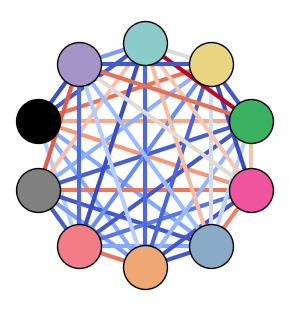

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-5/xor_chimat


In [25]:
def interaction_network(chi_mat, ax):
    vmax=15
    vmin=-15

    indices = np.tril_indices(chi_mat.shape[0], k=-1)
    indices = [idx[1:] for idx in indices]
    colors = plt.cm.coolwarm((chi_mat[*indices]-vmin)/(vmax-vmin))

    x = np.cos((2*np.pi/10) * (4.5+np.arange(10)))
    y = np.sin((2*np.pi/10) * (4.5+np.arange(10)))
    all_node_colors = ['black', 'gray'] + ['#F37D86', node_colors[-2], '#88AAC7'] + [node_pink, node_green] + ['#E9D581', node_colors[-1], '#A594C7']

    for i in range(len(colors)):
        sm = ax.plot([x[indices[0][i]], x[indices[1][i]]], [y[indices[0][i]], y[indices[1][i]]], linewidth = 3, color = colors[i])
    for j in range(len(x)):
        ax.scatter(x[j], y[j], s=1000, color=all_node_colors[j], edgecolor='black', zorder=2)
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.3, 1.3)

    im = ax.imshow([[0]], cmap='coolwarm', vmin=-15, vmax=15)
    im.set_visible(False)

    #cbar = plt.colorbar(im, orientation='horizontal', location='top')
    #cbar.ax.tick_params(labelsize=20)
    #cbar.set_label(r'$\chi$', fontsize=20, labelpad=20)
    
    ax.set_axis_off()
    ax.set_aspect(1)

    return ax

chi_mat = np.load(figfol + 'xor_data/chi_matrix_xor_6hidden.npy')

fig, ax = plt.subplots(1,1, figsize=(3,3), layout='compressed')

interaction_network(chi_mat, ax)

plt.show()

fig_name = 'xor_chimat'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name, transparent=True)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-5/random_interactions


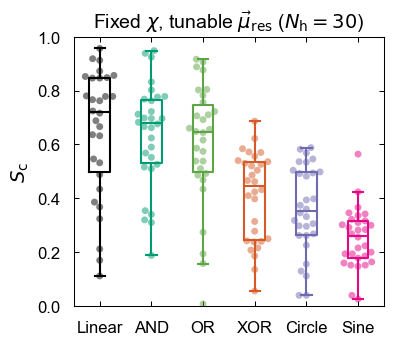

In [26]:
custom_colors = ['black', '#009B72', '#5DA444', '#D55A26', '#6F6AB0', '#E50786']

df = np.load(figfol + 'success_scores_Nh30.npy').T
#pd.read_csv(figfol+'f1_scores_corrected_comparison_Nh_30.csv', index_col=0)
fig,ax = plt.subplots(1,1,figsize=(4,3.5))
make_nice_axis(ax)  
mean_values = np.mean(df, axis=0)#df.mean()
sns.swarmplot(data=df, ax=ax, palette=custom_colors, alpha=0.5, s=5)
sns.boxplot(data=df, ax=ax, palette=custom_colors, fill=False, linewidth=1.5, width=0.4,showfliers=False)
ax.set_title(r'Fixed $\chi$, tunable $\vec{\mu}_\text{res}$ ($N_\text{h}=30$)', fontsize=14)
ax.set_ylabel(r'$S_\text{c}$')
#ax.set_title('Random interaction networks, 30 species',fontsize=10)
# Set y-axis limits to [0, 1]
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(['Linear', 'AND', 'OR', 'XOR', 'Circle', 'Sine'])
# Set xtick label font size to 14
ax.tick_params(axis='x', labelsize=12)

fig_save = True
fig_name = 'random_interactions'

if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)
plt.show()

## Figure 6: Surface condensates classify reference high-dimensional datasets

In [27]:
figure = 'fig-6'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-6/


/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-6/mnist_digits


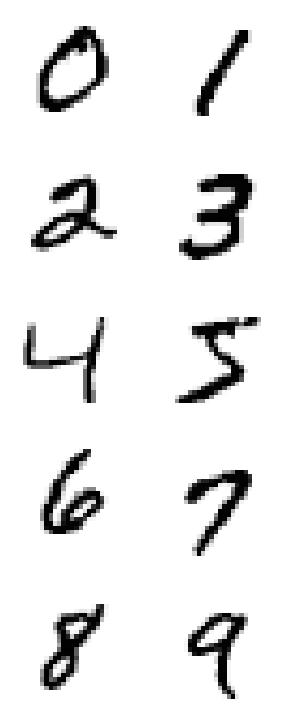

In [28]:
from tensorflow.keras import datasets
(x_train, y_train), _ = datasets.mnist.load_data()

indices = [list(y_train).index(i) for i in range(10)]
digits = x_train[indices]

fig, ax = plt.subplots(5,2, figsize=(3.5,9))

for i in range(5):
    for j in range(2):
        ax[i][j].imshow(digits[j+2*i], cmap='Grays')
        ax[i][j].set_axis_off()

fig_save = True
fig_name = 'mnist_digits'

if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250909//fig-6/mnist_success_vs_hidden


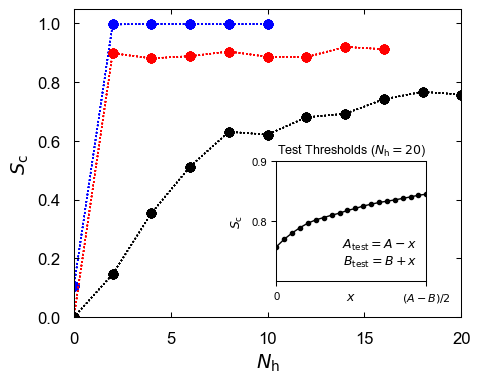

In [29]:
data_digits_01 = np.load(figfol + 'digits_01_test_success.npy')#'digits_01_summary_files/max_success_data.npy')
data_digits_35 = np.load(figfol + 'digits_35_test_success.npy')#'digits_35_summary_files/max_success_data.npy')
data_digits = np.load(figfol + 'digits_test_success.npy')#'digits_summary_files/max_success_data.npy')

fig, ax = plt.subplots(1, 1, figsize=(5,4))
make_nice_axis(ax)

ax.plot(np.arange(0,12, 2), data_digits_01[:-2], 'o:', color='blue')
ax.plot(np.arange(0,18, 2), data_digits_35[:-2], 'o:', color='red')
ax.plot(np.arange(0,22, 2), data_digits, 'o:', color='black')
ax.set_xlim(0,20)
ax.set_ylim(0,)
ax.set_xlabel(r'$N_\text{h}$')
ax.set_ylabel(r'$S_\text{c}$')

left, bottom, width, height = [0.53, 0.2, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

xvals = np.linspace(0,0.425,20)
data = np.load(figfol + 'leniency_test.npy')#'digits_summary_files/leniency_test.npy')
#ax2.axvline(xvals[-1], color='gray', ls=':')
#ax2.text(s=r'$a_\text{test}=b_\text{test}$', x=0.42, y=0.8, ha='right', color='gray', fontsize=14)
ax2.plot(xvals, data, '.-', color='black', label='max')
ax2.set_xlim(0,xvals[-1])
ax2.set_ylim(0.7,0.9)
ax2.set_title(r'Test Thresholds ($N_\text{h}=20$)', fontsize=9)
ax2.text(s=r'$A_\text{test}=A-x$'+'\n'+r'$B_\text{test}=B+x$', x=0.4, y=0.72, fontsize=9, ha='right', va='bottom')
ax2.set_xlabel(r'$x$', fontsize=9, labelpad=-9)
ax2.set_ylabel(r'$S_\text{c}$', fontsize=9)
ax2.set_xticks([0, 0.425])
ax2.set_xticklabels([0,r'$(A-B)/2$'])
ax2.set_yticks([0.8, 0.9])
ax2.tick_params(axis='both', which='major', labelsize=8)

fig_save = True
fig_name = 'mnist_success_vs_hidden'

if fig_save:
    print(figdir + '/' + figure + '/' + fig_name)
    save_figure(fig, fig_file=figdir + '/' + figure + '/' + fig_name)
plt.show()

## Figure 7: Lattice MC can validate model A results

In [32]:
figure = 'fig-7'
figfol = figdata_path + figure + '/'
print(figfol)

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/figure-data/fig-7/


In [ ]:
filename = figfol + 'and_N_7_final_lattices.npy'
loaded_data = np.load(filename)

lattice = loaded_data[0]

species_to_plot = [1,2]
fig, ax = imageLattice_spheres_fresnel(lattice, species_to_plot=species_to_plot)

fig_save = True
fig_name = 'lattice_and_init'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/2025_zentner_multiphase_classification/Figures/Output/20250903//fig-7/lattice_and_final


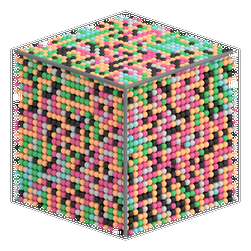

In [ ]:
species_to_plot = [1,2,3,4,5,6]
fig, ax = imageLattice_spheres_fresnel(lattice, species_to_plot=species_to_plot)

fig_save = True
fig_name = 'lattice_and_final'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()

/Users/azentner/Desktop/Research/Harvard/Brenner/condensate-computation/Figures/Output/20250908//fig-7/lattice_gas_all_gates


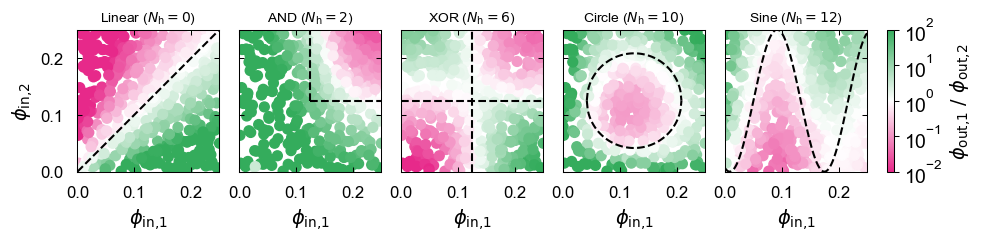

In [ ]:
# Plot all 5 gates (linear, AND, XOR, CIRCLE, SINE) in a single row

fig, ax = plt.subplots(1, 5, figsize=(10, 2.3), sharex=True, sharey=True, layout='compressed')

for a in ax:
    make_nice_axis(a)
    a.set_xlim(0, 0.25)
    a.set_ylim(0, 0.25)
    a.set_aspect(1)
    a.set_xticks([0, 0.1, 0.2])
    a.set_yticks([0, 0.1, 0.2])
    a.label_outer()

# Only set x labels for bottom row (here, all axes) and y label for first column
for a in ax:
    a.set_xlabel(r'$\phi_\text{in,1}$')
ax[0].set_ylabel(r'$\phi_\text{in,2}$')

# Use LogNorm for logarithmic color scale
scale = 1e-2
norm = mcolors.LogNorm(vmin=scale, vmax=1/scale)  # Adjust vmin and vmax as needed

# Set a marker size parameter to be used in all scatter plots
markersize = 50  # Adjust as desired

# 1) LINEAR gate: far left (0)
filename = figfol + 'linear_N_5_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[0].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm, s=markersize)
ax[0].set_title(r'Linear ($N_\text{h}=0$)', fontsize=10)
# Linear boundary: diagonal
ax[0].plot([0, 0.25], [0, 0.25], ls='--', color='black', lw=1.5)

# 2) AND gate: (1)
filename = figfol + 'and_N_7_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[1].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm, s=markersize)
ax[1].set_title(r'AND ($N_\text{h}=2$)', fontsize=10)
ax[1].axhline(0.125, xmin=0.5, ls='--', color='black', lw=1.5)
ax[1].axvline(0.125, ymin=0.5, ls='--', color='black', lw=1.5)

# 3) XOR gate: (2)
filename = figfol + 'xor_N_11_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[2].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm, s=markersize)
ax[2].set_title(r'XOR ($N_\text{h}=6$)', fontsize=10)
ax[2].axhline(0.125, ls='--', color='black', lw=1.5)
ax[2].axvline(0.125, ls='--', color='black', lw=1.5)

# 4) CIRCLE: (3)
filename = figfol + 'circle_N_15_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[3].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm, s=markersize)
ax[3].set_title(r'Circle ($N_\text{h}=10$)', fontsize=10)
r = 0.25/3
xvals = 0.125 + np.linspace(-r, r, 100)
ax[3].plot(xvals, 0.125 + np.sqrt(r**2 - (xvals-0.125)**2), ls='--', color='black', lw=1.5)
ax[3].plot(xvals, 0.125 - np.sqrt(r**2 - (xvals-0.125)**2), ls='--', color='black', lw=1.5)

# 5) SINE: (4)

filename = figfol + 'sine_N_17_testdata_plot_beta_2.npz'
loaded_data = np.load(filename)
all_phi1 = loaded_data['phi1']
all_phi2 = loaded_data['phi2']
all_frac_ratio = loaded_data['frac_ratio']
sc = ax[4].scatter(all_phi1, all_phi2, c=all_frac_ratio, cmap=custom_cmap, norm=norm, s=markersize)
ax[4].set_title(r'Sine ($N_\text{h}=12$)', fontsize=10)
max_input = 0.25
xvals = np.linspace(0, max_input, 500)
sine_boundary = (max_input / 2) * (1 + np.sin((3 / 2) * 2 * np.pi * (xvals / max_input - 0.2)))
ax[4].plot(xvals, sine_boundary, 'k--', lw=1.5)

# Colorbar
cbar = fig.colorbar(sc, ax=ax[4], label=r'$\phi_\text{out,1}\ /\ \phi_\text{out,2}$', pad=0.14)
cbar.set_ticks([1e-2, 1e-1, 1, 1e1, 1e2])
cbar.outline.set_linewidth(0.75)

fig_save = True
fig_name = 'lattice_gas_all_gates'

if fig_save:
    print(figdir+ '/' + figure + '/' +fig_name)
    save_figure(fig, fig_file=figdir+ '/' + figure + '/' +fig_name)
plt.show()